# GYM Chrun Us - EDA
https://www.kaggle.com/datasets/adrianvinueza/gym-customers-features-and-churn/data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('./data/gym_churn_us.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
disc_col = []
for column in data.columns:
    if data[column].dtypes != object: # and data[column].nunique() < 30:
        print(f"{column} : {data[column].unique()}")
        disc_col.append(column)
        print("====================================")

gender : [1 0]
Near_Location : [1 0]
Partner : [1 0]
Promo_friends : [1 0]
Phone : [0 1]
Contract_period : [ 6 12  1]
Group_visits : [1 0]
Age : [29 31 28 33 26 34 32 30 23 27 35 25 36 24 21 37 22 19 20 38 39 18 41]
Avg_additional_charges_total : [ 14.22747042 113.20293765 129.44847933 ...  78.25054157  61.91265691
 178.86181361]
Month_to_end_contract : [ 5. 12.  1.  6.  3. 10. 11.  9.  4.  7.  8.  2.]
Lifetime : [ 3  7  2  0  1 11  4  8 14  6  5 15 12 21 10 20  9 13 17 16 24 22 31 26
 23 18 19 27 29]
Avg_class_frequency_total : [0.02039795 1.92293606 1.85909835 ... 2.78614636 1.63010814 1.10183221]
Avg_class_frequency_current_month : [0.         1.91024352 1.73650189 ... 2.8314395  1.59623664 1.03526976]
Churn : [0 1]


In [8]:
cont_col = []
for column in data.columns:
    if data[column].dtypes != object: # and data[column].nunique() > 30:
        print(f"{column} : Minimum: {data[column].min()}, Maximum: {data[column].max()}")
        cont_col.append(column)
        print("====================================")

gender : Minimum: 0, Maximum: 1
Near_Location : Minimum: 0, Maximum: 1
Partner : Minimum: 0, Maximum: 1
Promo_friends : Minimum: 0, Maximum: 1
Phone : Minimum: 0, Maximum: 1
Contract_period : Minimum: 1, Maximum: 12
Group_visits : Minimum: 0, Maximum: 1
Age : Minimum: 18, Maximum: 41
Avg_additional_charges_total : Minimum: 0.1482047884566242, Maximum: 552.5907403868798
Month_to_end_contract : Minimum: 1.0, Maximum: 12.0
Lifetime : Minimum: 0, Maximum: 31
Avg_class_frequency_total : Minimum: 0.0, Maximum: 6.02366847599591
Avg_class_frequency_current_month : Minimum: 0.0, Maximum: 6.146782880452392
Churn : Minimum: 0, Maximum: 1


In [9]:
custom_colors = [
    '#1f77b4',  # 파랑
    '#ff7f0e',  # 주황
    '#2ca02c',  # 초록
    '#d62728',  # 빨강
    '#9467bd',  # 보라
    '#8c564b',  # 갈색
    '#e377c2',  # 분홍
    '#7f7f7f',  # 회색
    '#bcbd22'   # 연두/올리브
]

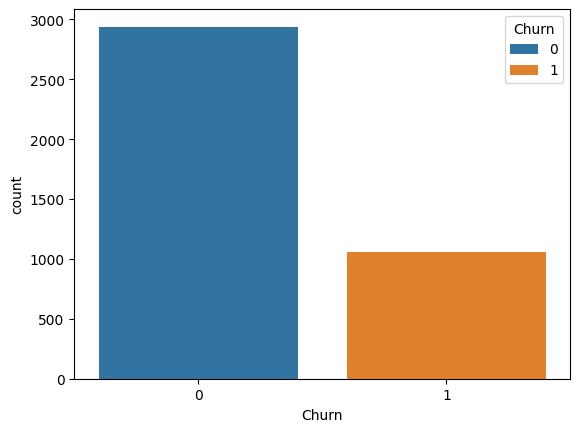

In [10]:
sns.countplot(x='Churn', data=data, hue = 'Churn', palette=custom_colors[:2])
plt.show()

C:\Users\HP001\AppData\Local\Temp\ipykernel_25052\4129387227.py:6: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=data, x=column, ax=axes[i], hue = column, palette=custom_colors)
C:\Users\HP001\AppData\Local\Temp\ipykernel_25052\4129387227.py:6: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=data, x=column, ax=axes[i], hue = column, palette=custom_colors)
C:\Users\HP001\AppData\Local\Temp\ipykernel_25052\4129387227.py:6: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=data, x=column, ax=axes[i], hue = column, palette=custom_colors)
C:\Users\HP001\AppData\Local\Temp\ipykernel_25052\4129387227.py:6: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.countplot(data=data, x=column, ax=axes[i], hue = column, palette=custom_colors)
C:\Users\HP0

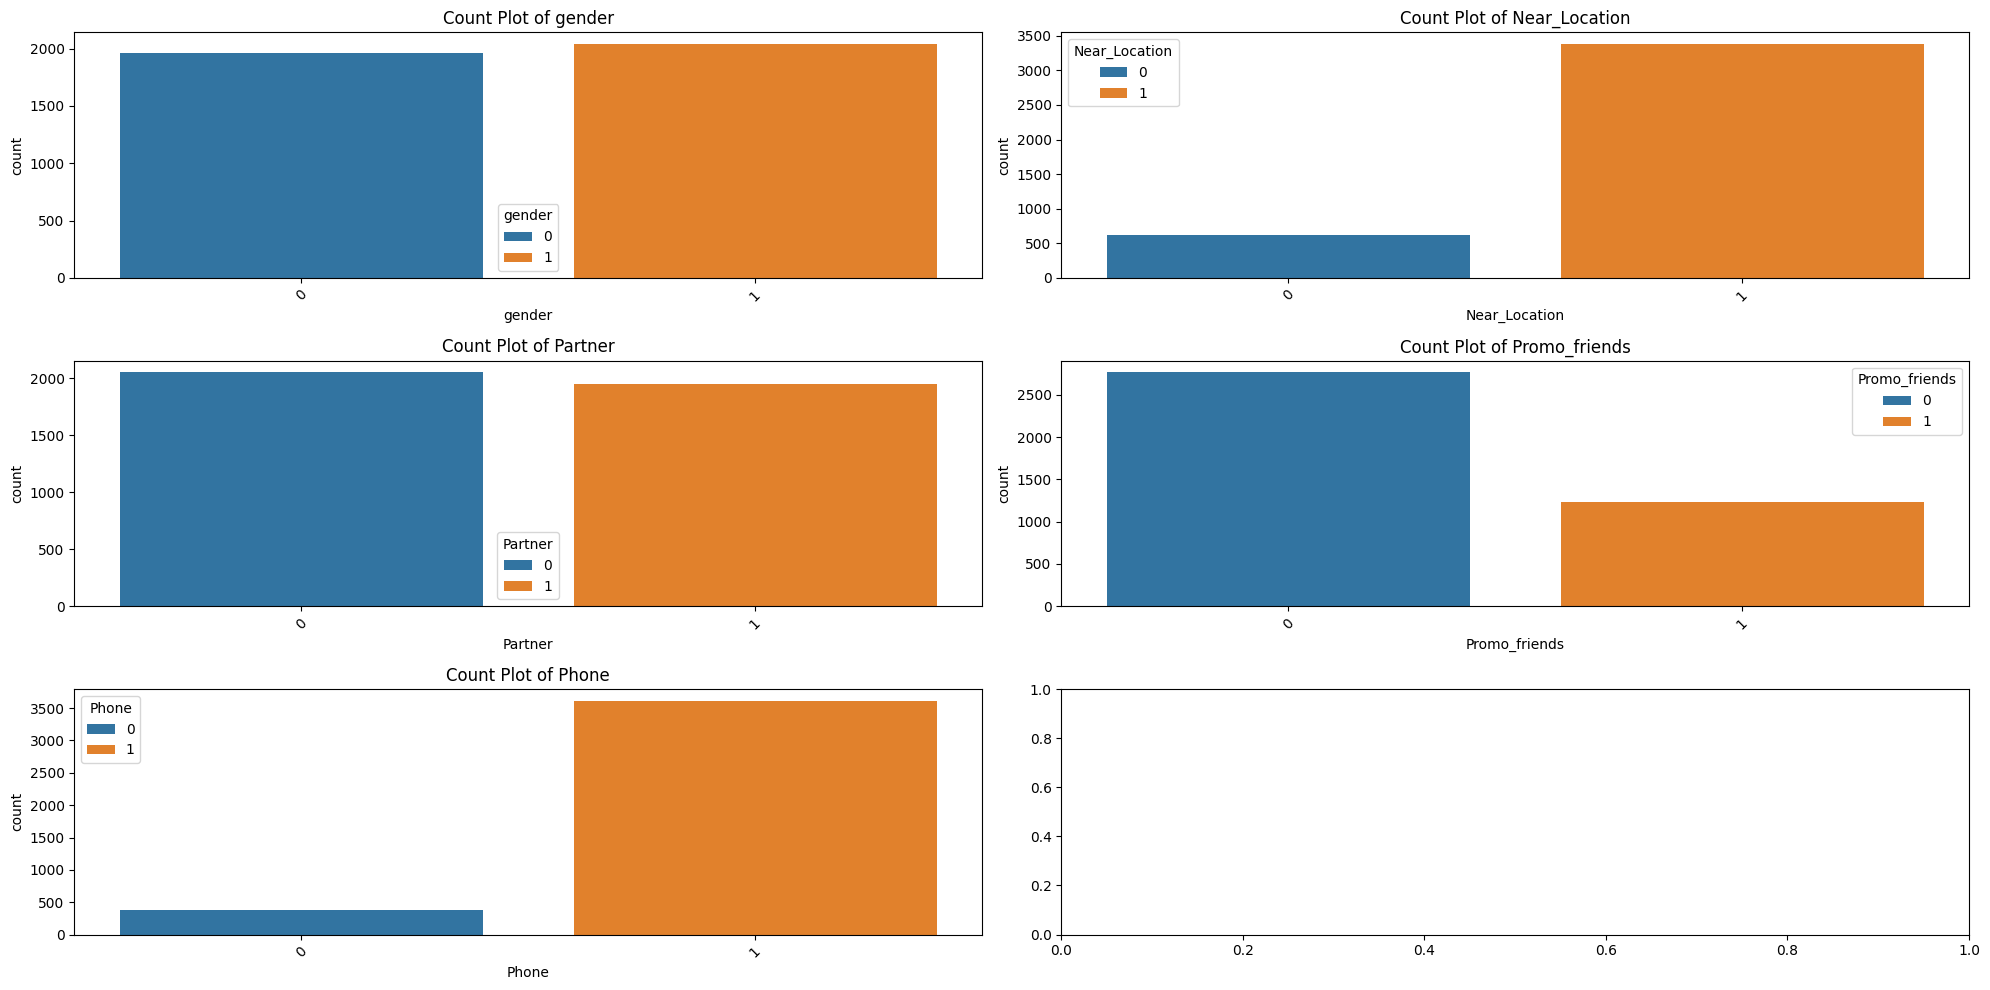

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes = axes.flatten()
columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone']

for i, column in enumerate(columns):
    sns.countplot(data=data, x=column, ax=axes[i], hue = column, palette=custom_colors)
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels if needed

plt.tight_layout()  
plt.show()

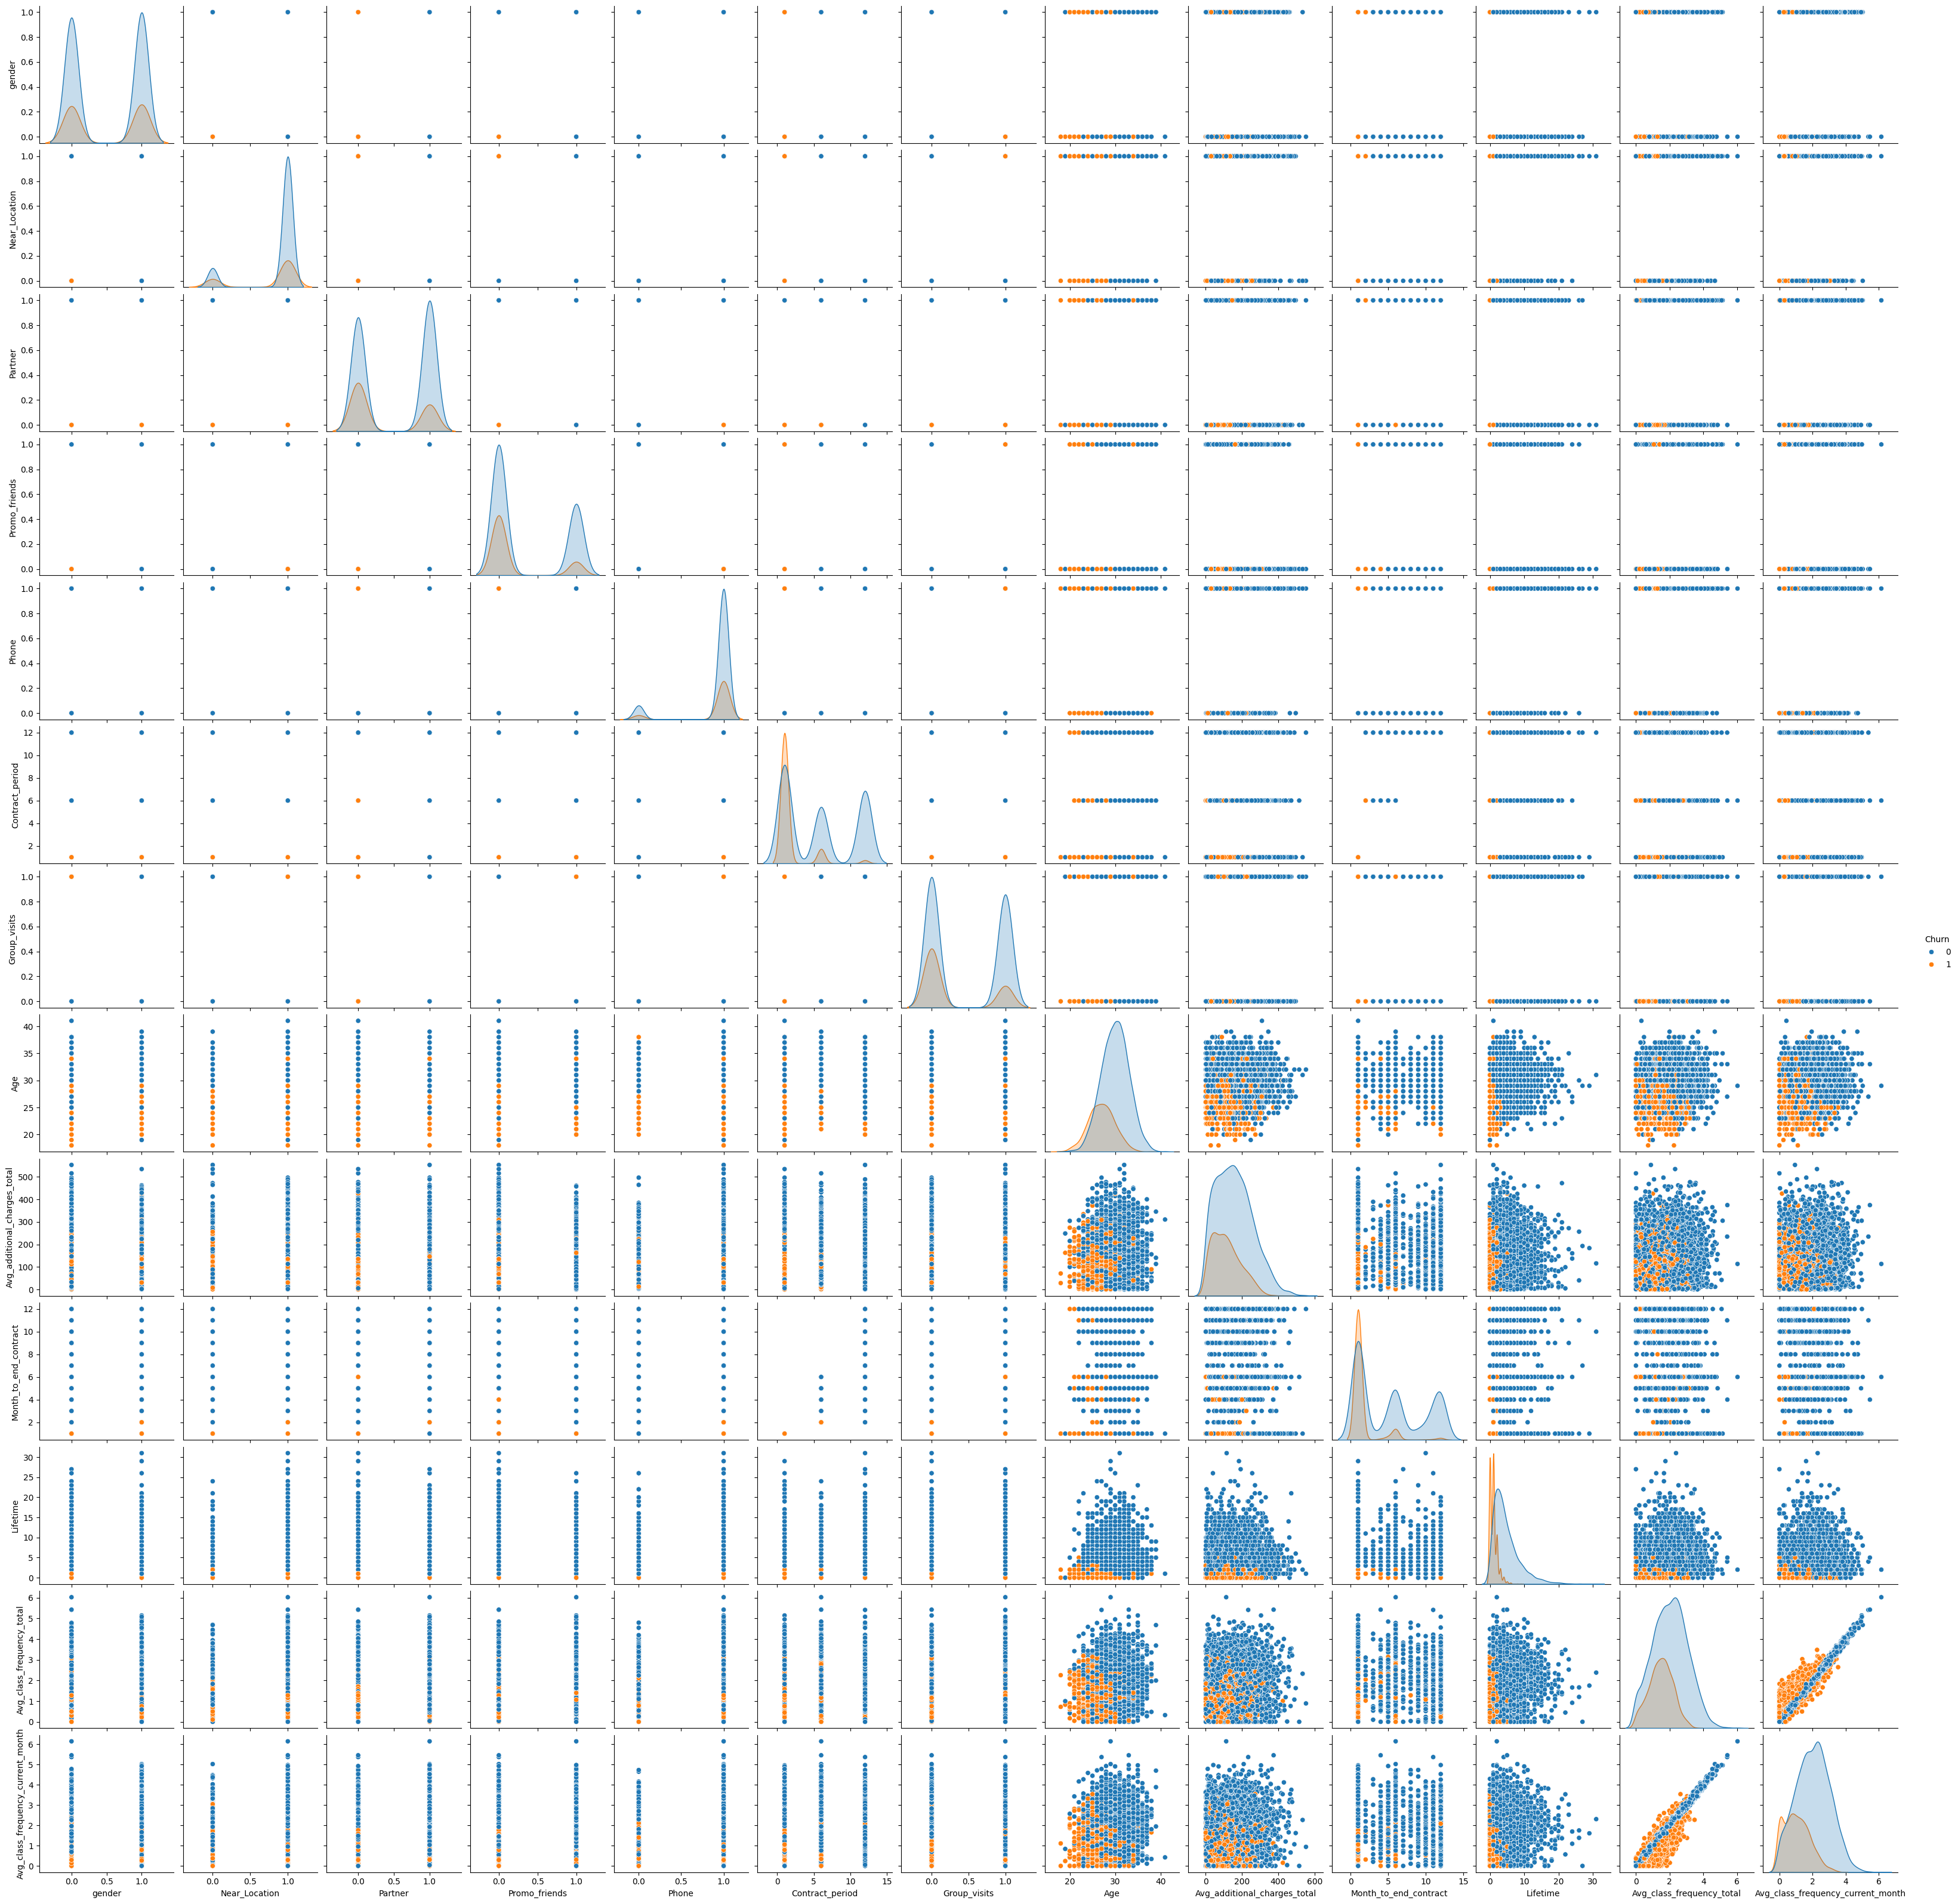

In [15]:
sns.pairplot(data, hue='Churn')
plt.show()

In [40]:
print(data.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
# df = data.drop(columns=['DailyRate', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'Over18', 'StandardHours'])
# df.head()

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# 변환한 매핑을 저장할 딕셔너리
label_mappings = {}

for col in ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 
            'JobRole', 'EducationField', 'OverTime', 'Over18', 'Attrition']:
    data[col] = encoder.fit_transform(data[col])
    # 매핑 저장
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# 매핑 결과 보기
for col, mapping in label_mappings.items():
    print(f"=== {col} ===")
    print(mapping)
    print()

=== BusinessTravel ===
{'Non-Travel': np.int64(0), 'Travel_Frequently': np.int64(1), 'Travel_Rarely': np.int64(2)}

=== Department ===
{'Human Resources': np.int64(0), 'Research & Development': np.int64(1), 'Sales': np.int64(2)}

=== Gender ===
{'Female': np.int64(0), 'Male': np.int64(1)}

=== MaritalStatus ===
{'Divorced': np.int64(0), 'Married': np.int64(1), 'Single': np.int64(2)}

=== JobRole ===
{'Healthcare Representative': np.int64(0), 'Human Resources': np.int64(1), 'Laboratory Technician': np.int64(2), 'Manager': np.int64(3), 'Manufacturing Director': np.int64(4), 'Research Director': np.int64(5), 'Research Scientist': np.int64(6), 'Sales Executive': np.int64(7), 'Sales Representative': np.int64(8)}

=== EducationField ===
{'Human Resources': np.int64(0), 'Life Sciences': np.int64(1), 'Marketing': np.int64(2), 'Medical': np.int64(3), 'Other': np.int64(4), 'Technical Degree': np.int64(5)}

=== OverTime ===
{'No': np.int64(0), 'Yes': np.int64(1)}

=== Over18 ===
{'Y': np.int64(0)

In [16]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


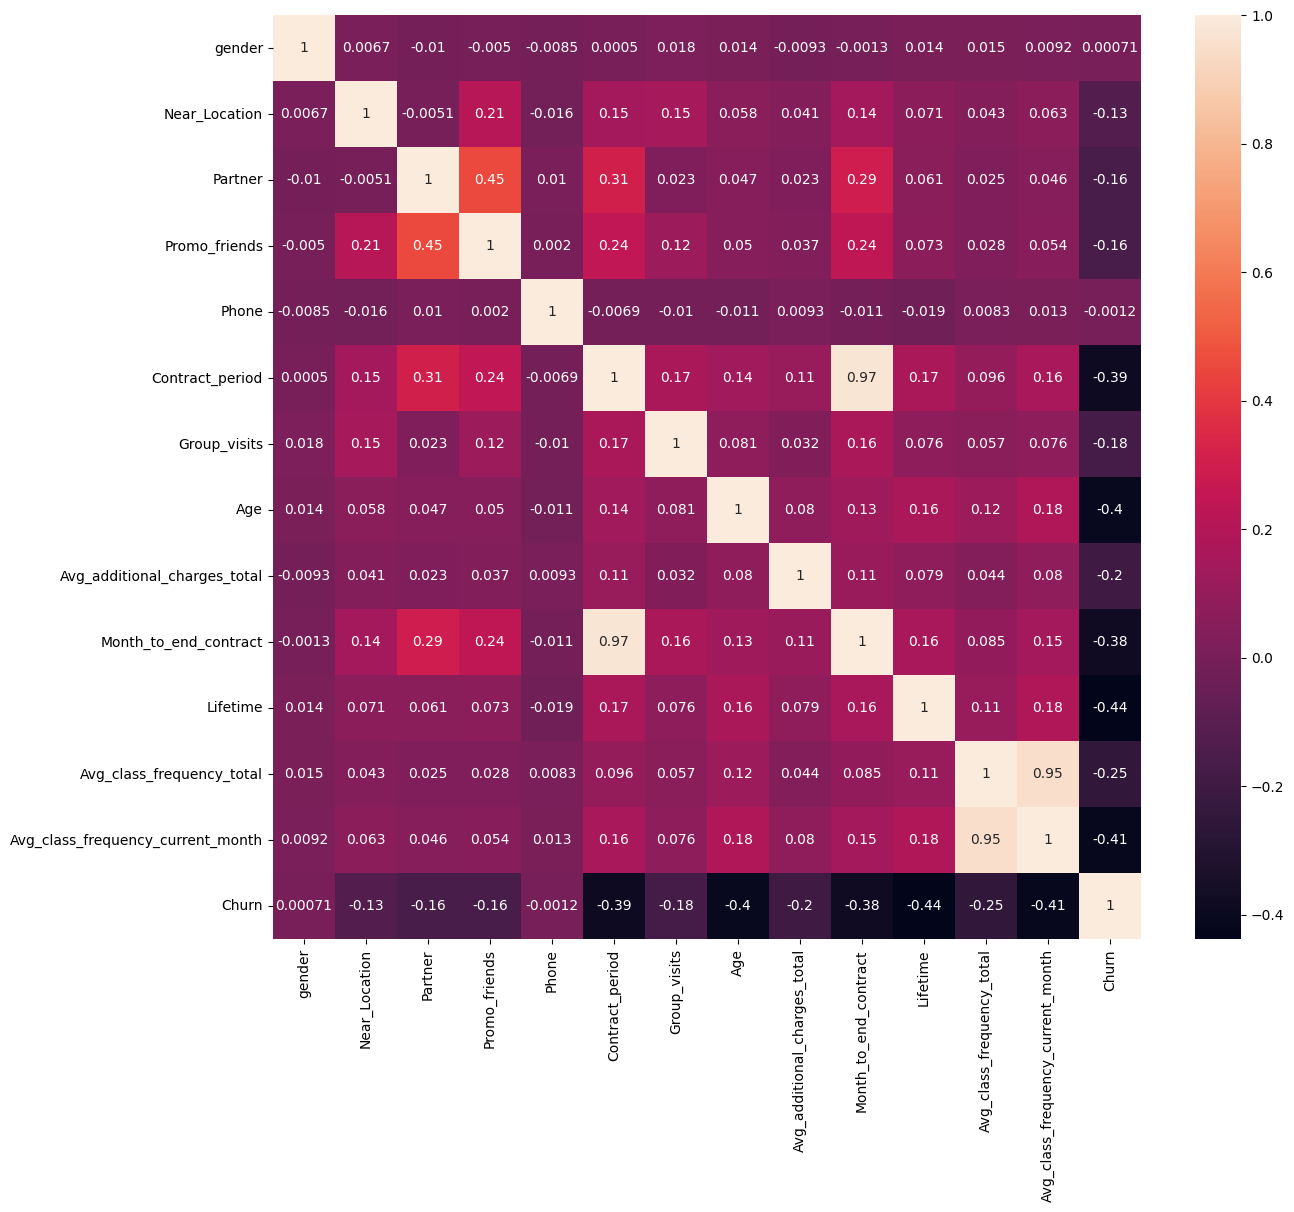

In [18]:
plt.figure(figsize=(14, 12)) 
sns.heatmap(corr_mat, annot=True)
plt.show()

In [19]:
filtered_corr = corr_mat[corr_mat.abs() >= 0.1]

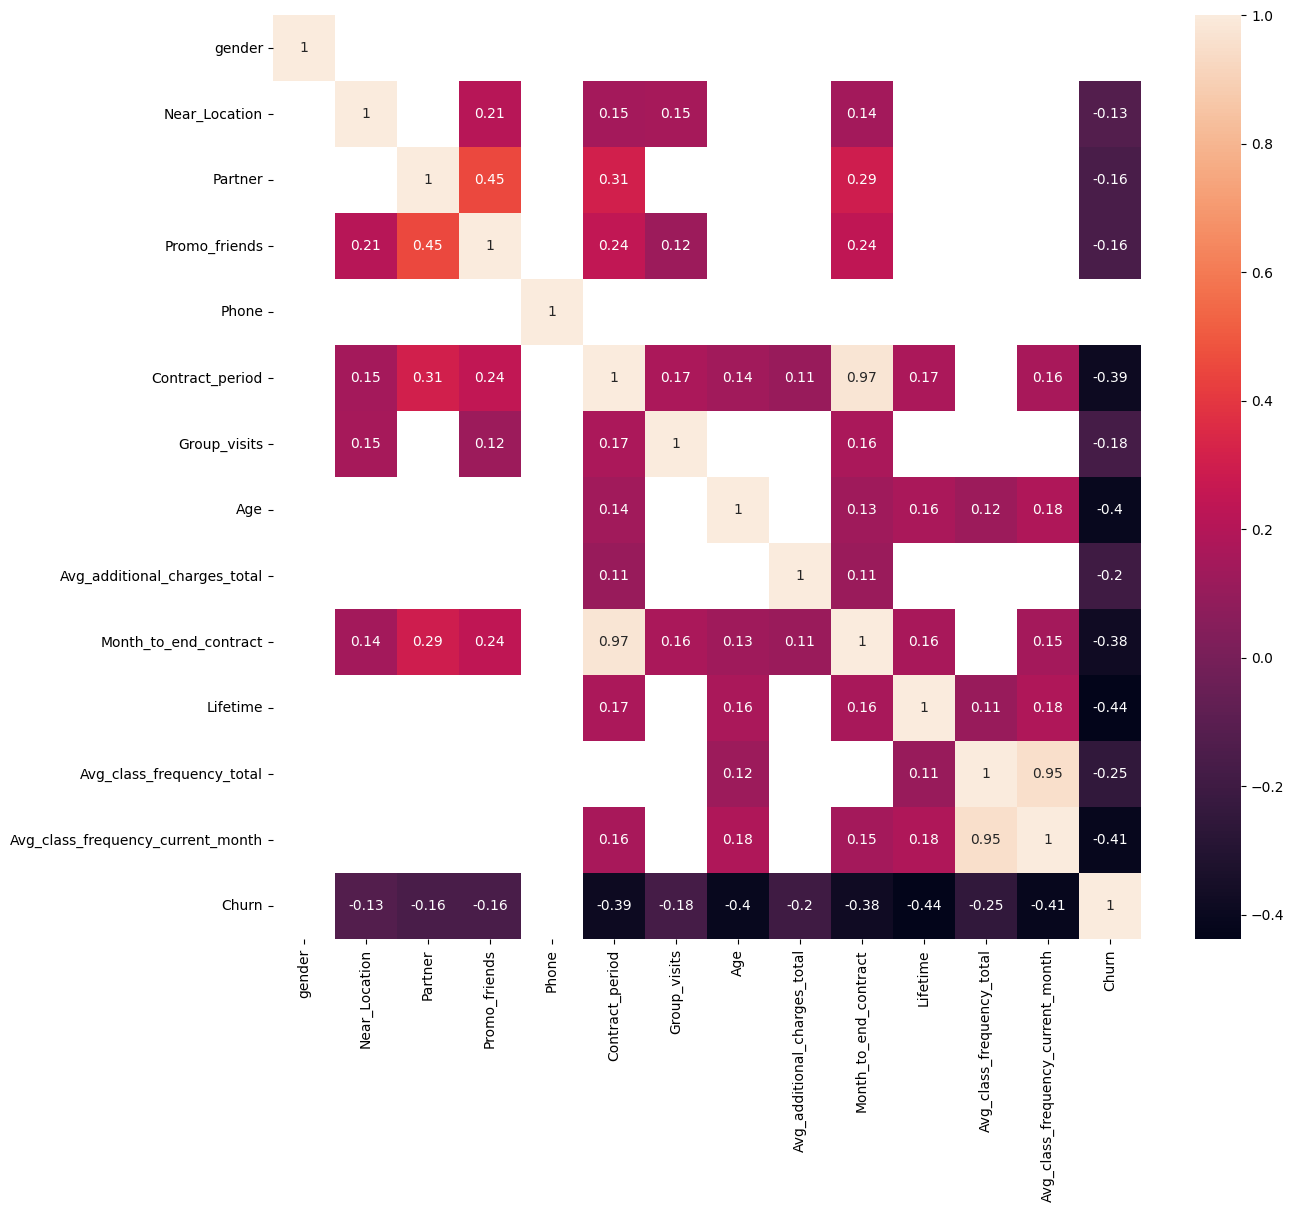

In [21]:
plt.figure(figsize=(14, 12)) 
sns.heatmap(filtered_corr, annot=True)
plt.show()

In [22]:
target = 'Churn'

# Attrition 열만 가져오기
target_corr = corr_mat[target]

# 조건: |상관계수| >= 0.1 인 것만 남기기
filtered_corr_attrition = target_corr[(target_corr <= -0.1) | (target_corr >= 0.1)]

print(filtered_corr_attrition)
print(len(filtered_corr_attrition))
filtered_columns = filtered_corr_attrition.index.tolist()
print(filtered_columns)

Near_Location                       -0.128098
Partner                             -0.157986
Promo_friends                       -0.162233
Contract_period                     -0.389984
Group_visits                        -0.175325
Age                                 -0.404735
Avg_additional_charges_total        -0.198697
Month_to_end_contract               -0.381393
Lifetime                            -0.438220
Avg_class_frequency_total           -0.249715
Avg_class_frequency_current_month   -0.412348
Churn                                1.000000
Name: Churn, dtype: float64
12
['Near_Location', 'Partner', 'Promo_friends', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']


In [23]:
df = data[filtered_columns]
df.head()

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,1,0,0,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,1,1,0,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [24]:
filtered_corr_mat = df.corr(numeric_only=True)
filtered_corr_mat

,Near_Location,Partner,Promo_friends,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Near_Location,1.000000,-0.005119,0.210964,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.005119,1.000000,0.451960,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,0.210964,0.451960,1.000000,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Contract_period,0.150233,0.306166,0.244552,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.154728,0.022710,0.120170,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.058358,0.047480,0.050113,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,0.040761,0.022941,0.036898,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,0.143961,0.294632,0.239553,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393
Lifetime,0.070921,0.061229,0.072721,0.170725,0.075853,0.164693,0.079028,0.161078,1.000000,0.112338,0.181975,-0.438220
Avg_class_frequency_total,0.043127,0.024938,0.028063,0.096211,0.056695,0.119953,0.044426,0.085387,0.112338,1.000000,0.952739,-0.249715


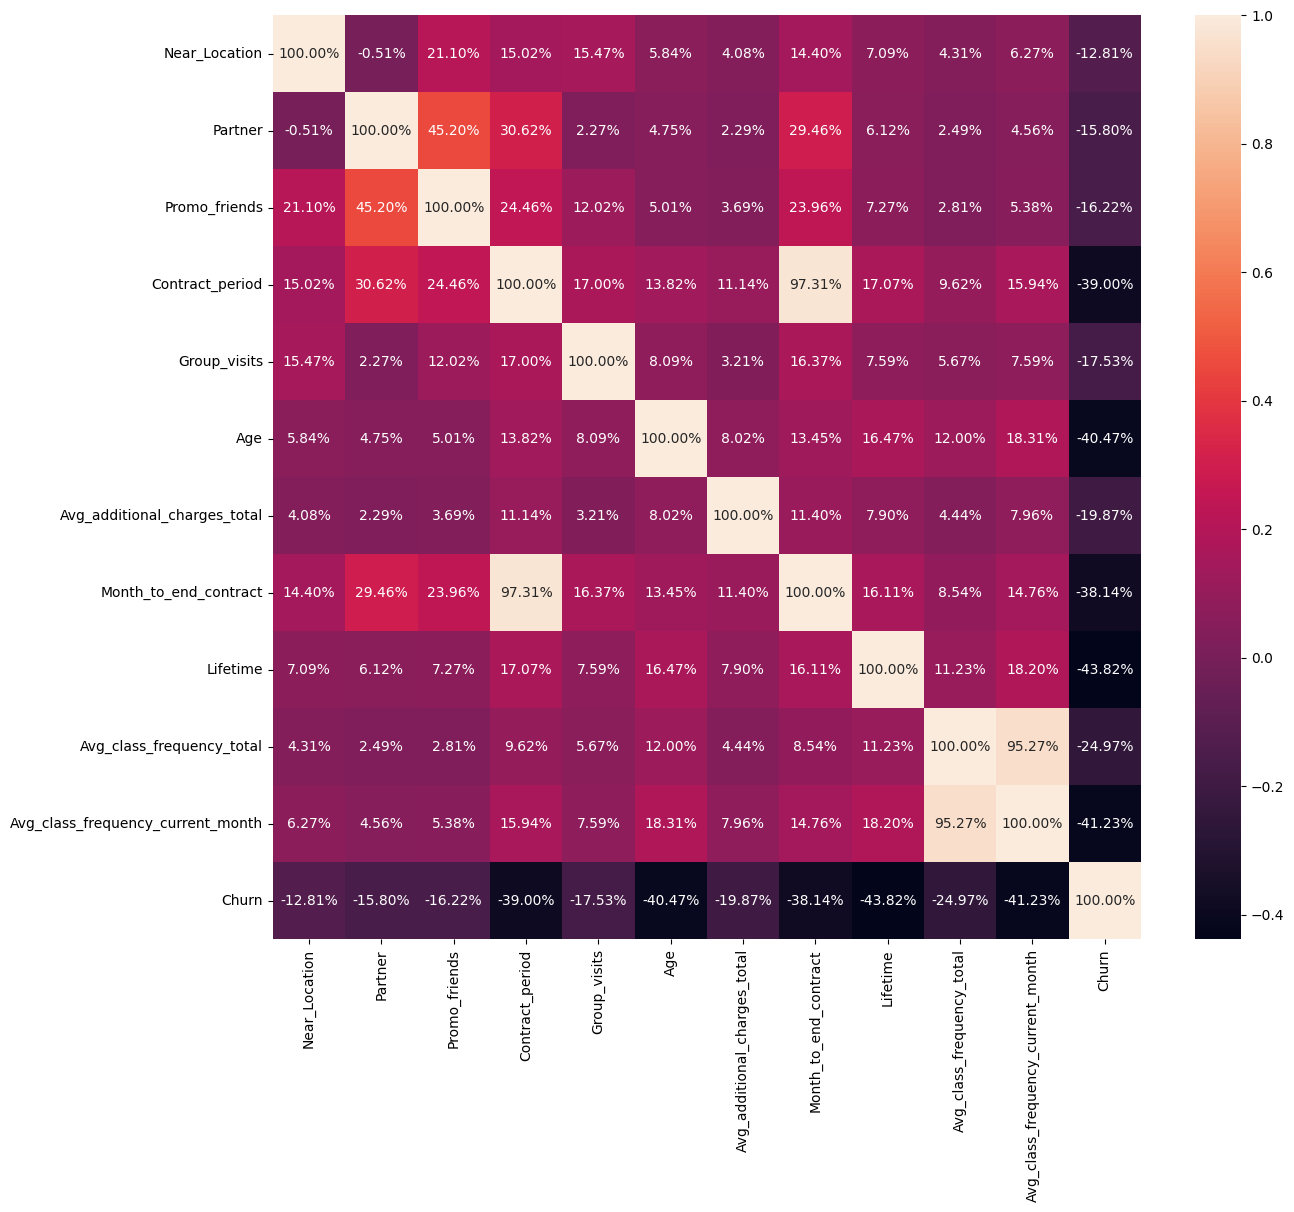

In [25]:
plt.figure(figsize=(14, 12)) 
sns.heatmap(filtered_corr_mat, annot=True, fmt='.2%')
plt.show()